In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the catalog data
file_path = '/Users/zuhair/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Research/PhD_Monash/Paper2/time-series/data/SUeq_data.csv'
# file_path = '/Users/zuhair/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Research/PhD_Monash/Paper2/time-series/data/ryu_kur_class_by_loc_net.csv'
catalog = pd.read_csv(file_path)


catalog = catalog[(catalog['MW'] >=6)]

# catalog = catalog[(catalog['LAT'] > 33)]

# catalog = catalog[(catalog['LAT'] < 15) & (catalog['LAT'] >= -1)] #sunda
# catalog = catalog[(catalog['LAT'] < 42)] #kuril-kamchatka
# catalog = catalog[(catalog['LAT'] < 42) & (catalog['LAT'] > 34)] #japan

# catalog = catalog[(catalog['LAT'] < 15) & (catalog['LAT'] >= -1) 
#                       & (catalog['MW'] >= 6.0)]

# catalog = catalog[(catalog['LAT'] < 15) & (catalog['LAT'] >= -1)]

# catalog_SUM_mthrust = catalog[(catalog['LAT'] < 15) & (catalog['LAT'] >= -1) 
#                      & (catalog['MW'] >= 5.0) & (catalog['CLASS'] == 'UPPER')]
                                                  
#catalog = catalog[(catalog['LAT'] > -1)]

# # Concatenate catalog_SUM_mthrust and catalog_java_dgoing vertically
# catalog = pd.concat([catalog_SUM, catalog_java_dw_mthrust], axis=0).reset_index(drop=True)

# Display the first few rows of the dataset to understand its structure
# catalog.head()

In [2]:
catalog.columns

Index(['LON', 'LAT', 'DEPTH', 'DATE', 'TIME', 'EVENT_ID', 'DEPFIX', 'DEPQUAL',
       'EX', 'MO', 'MW', 'EX.1', 'MRR', 'MTT', 'MPP', 'MRT', 'MTP', 'MPR',
       'STRIKE', 'DIP', 'RAKE', 'STRIKE.1', 'DIP.1', 'RAKE.1', 'EX.2', 'T_VAL',
       'T_PL', 'T_AZM', 'P_VAL', 'P_PL', 'P_AZM', 'N_VAL', 'N_PL', 'N_AZM',
       'SLAB_DIP', 'CLASS', 'P(km)', 'Q(km)', 'R(deg)', 'S(deg)', 'ALONG',
       'PROF', 'TTSUM', 'SINSQ_T', 'SINSQ_SS', 'SINSQ_N', 'TYPE', 'CORR_T_PL',
       'CORR_N_PL', 'CORR_P_PL', 'SINSQ_T_2', 'SINSQ_SS_2', 'SINSQ_N_2',
       'TYPE_2', 'CLASS1', 'TYPE1', 'Unnamed: 56', 'CLASS.1', 'Unnamed: 58',
       'Unnamed: 59'],
      dtype='object')

/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_21246/4195352026.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalog['DATETIME'] = pd.to_datetime(catalog['DATE'], errors='coerce')


2635200.0 -3.0 0 1
5270400.0 -3.0 0 1
7905600.0 -3.0 0 1
10540800.0 -3.0 0 1
13176000.0 -3.0 0 1
15811200.0 -3.0 0 1
18446400.0 -3.0 0 1
21081600.0 -3.0 0 1
23716800.0 -3.0 0 1
26352000.0 -3.0 0 1
28987200.0 -3.0 0 1
2635200.0 -2.7 0 1
5270400.0 -2.7 0 1
7905600.0 -2.7 0 1
10540800.0 -2.7 0 1
13176000.0 -2.7 0 1
15811200.0 -2.7 0 1
18446400.0 -2.7 0 1
21081600.0 -2.7 0 1
23716800.0 -2.7 0 1
26352000.0 -2.7 0 1
28987200.0 -2.7 0 1
2635200.0 -2.4000000000000004 0 2
5270400.0 -2.4000000000000004 0 2
7905600.0 -2.4000000000000004 0 2
10540800.0 -2.4000000000000004 0 2
13176000.0 -2.4000000000000004 0 2
15811200.0 -2.4000000000000004 0 2
18446400.0 -2.4000000000000004 0 2
21081600.0 -2.4000000000000004 0 2
23716800.0 -2.4000000000000004 0 2
26352000.0 -2.4000000000000004 0 2
28987200.0 -2.4000000000000004 0 2
2635200.0 -2.1000000000000005 0 3
5270400.0 -2.1000000000000005 0 3
7905600.0 -2.1000000000000005 0 3
10540800.0 -2.1000000000000005 0 3
13176000.0 -2.1000000000000005 0 3
15811200.0 -

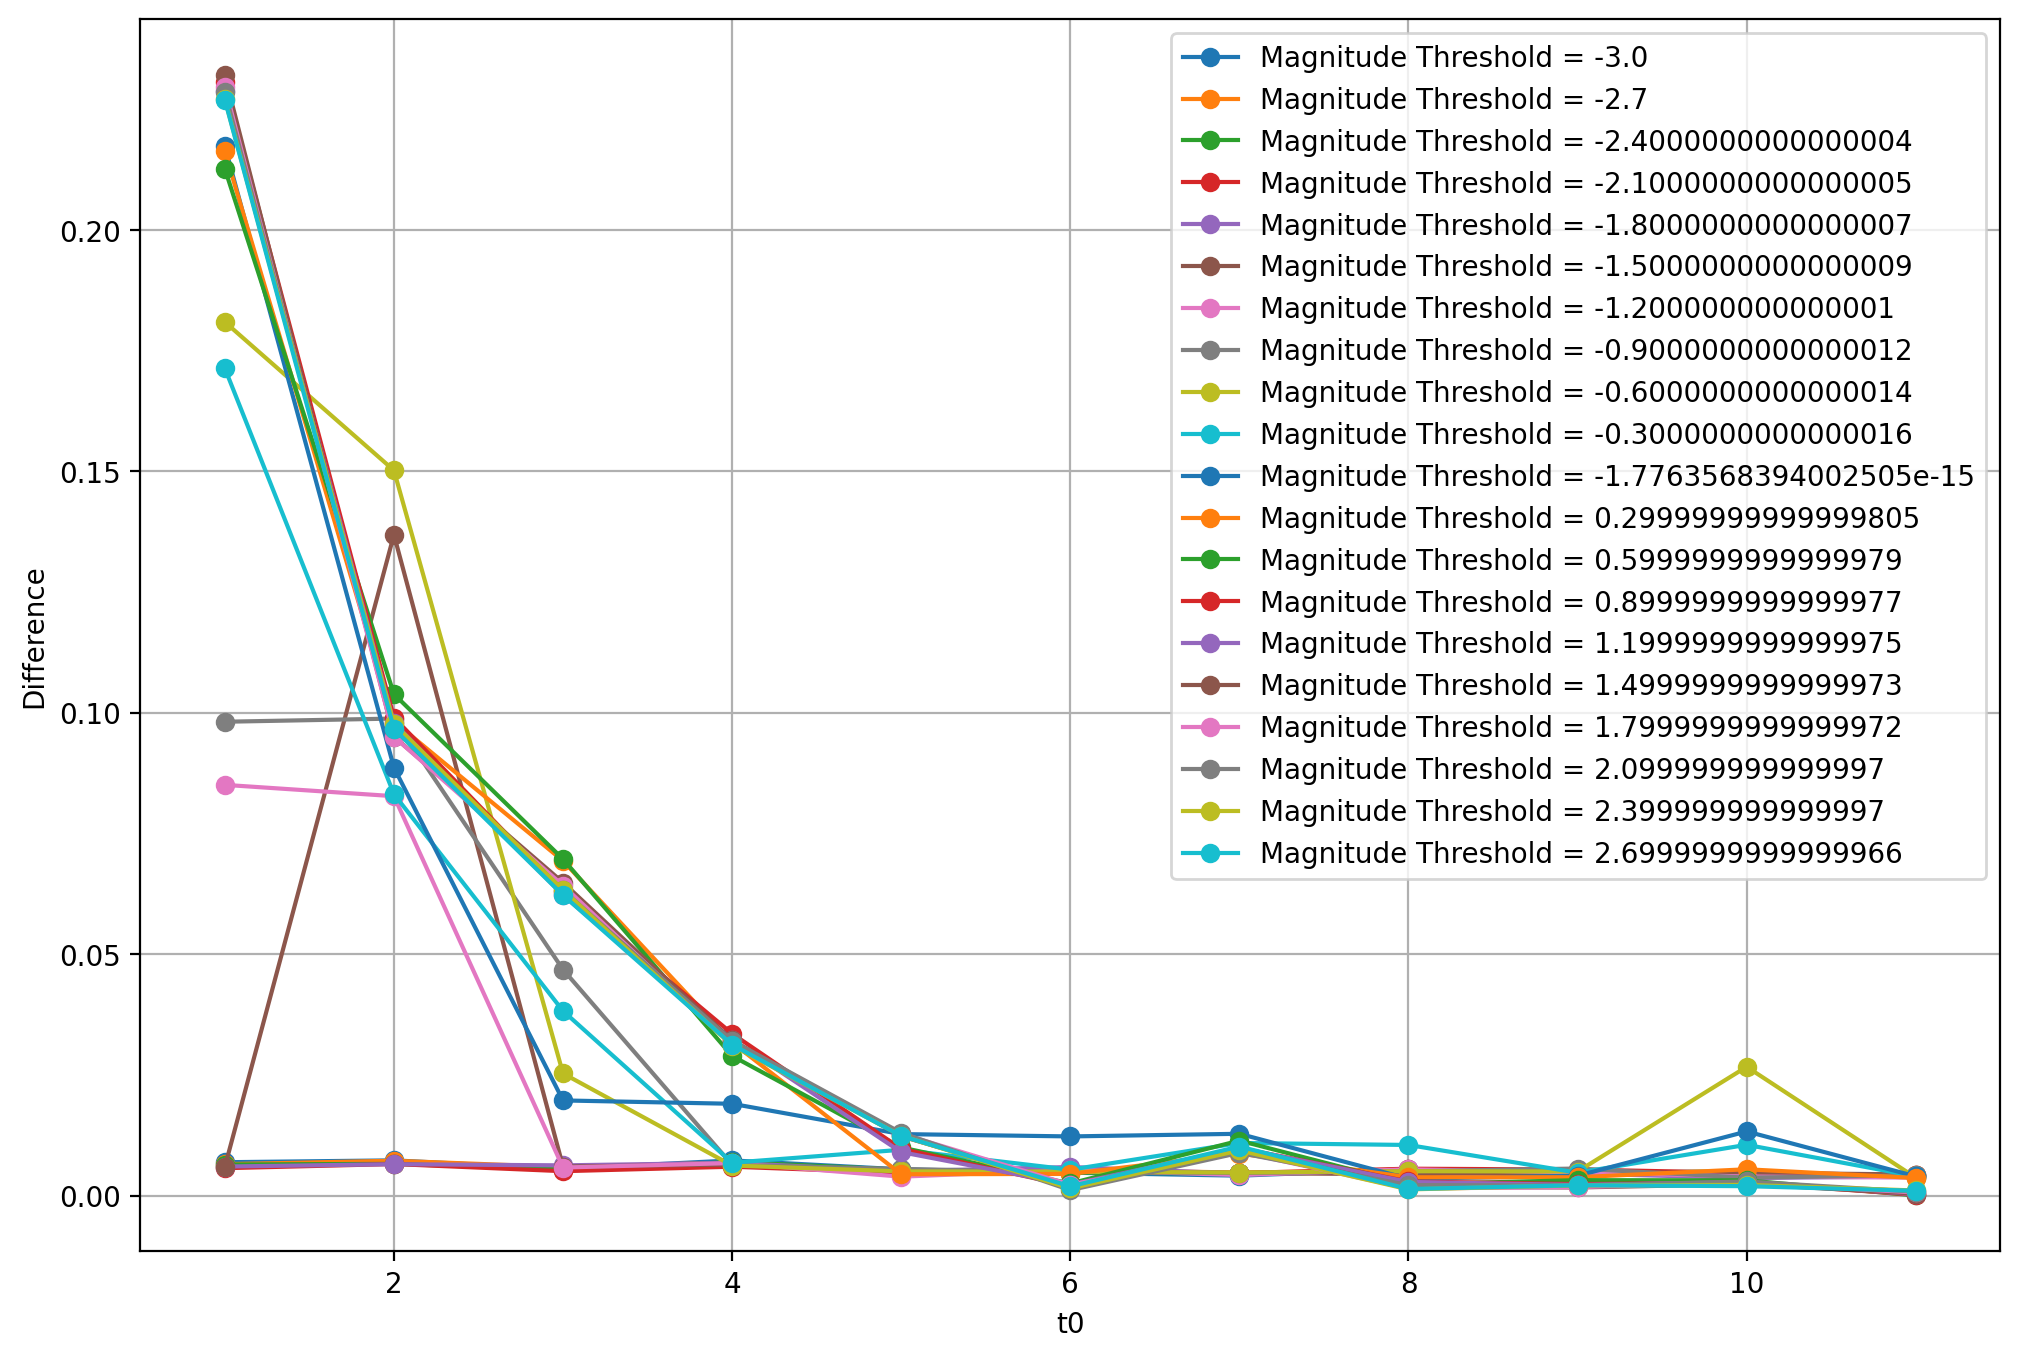

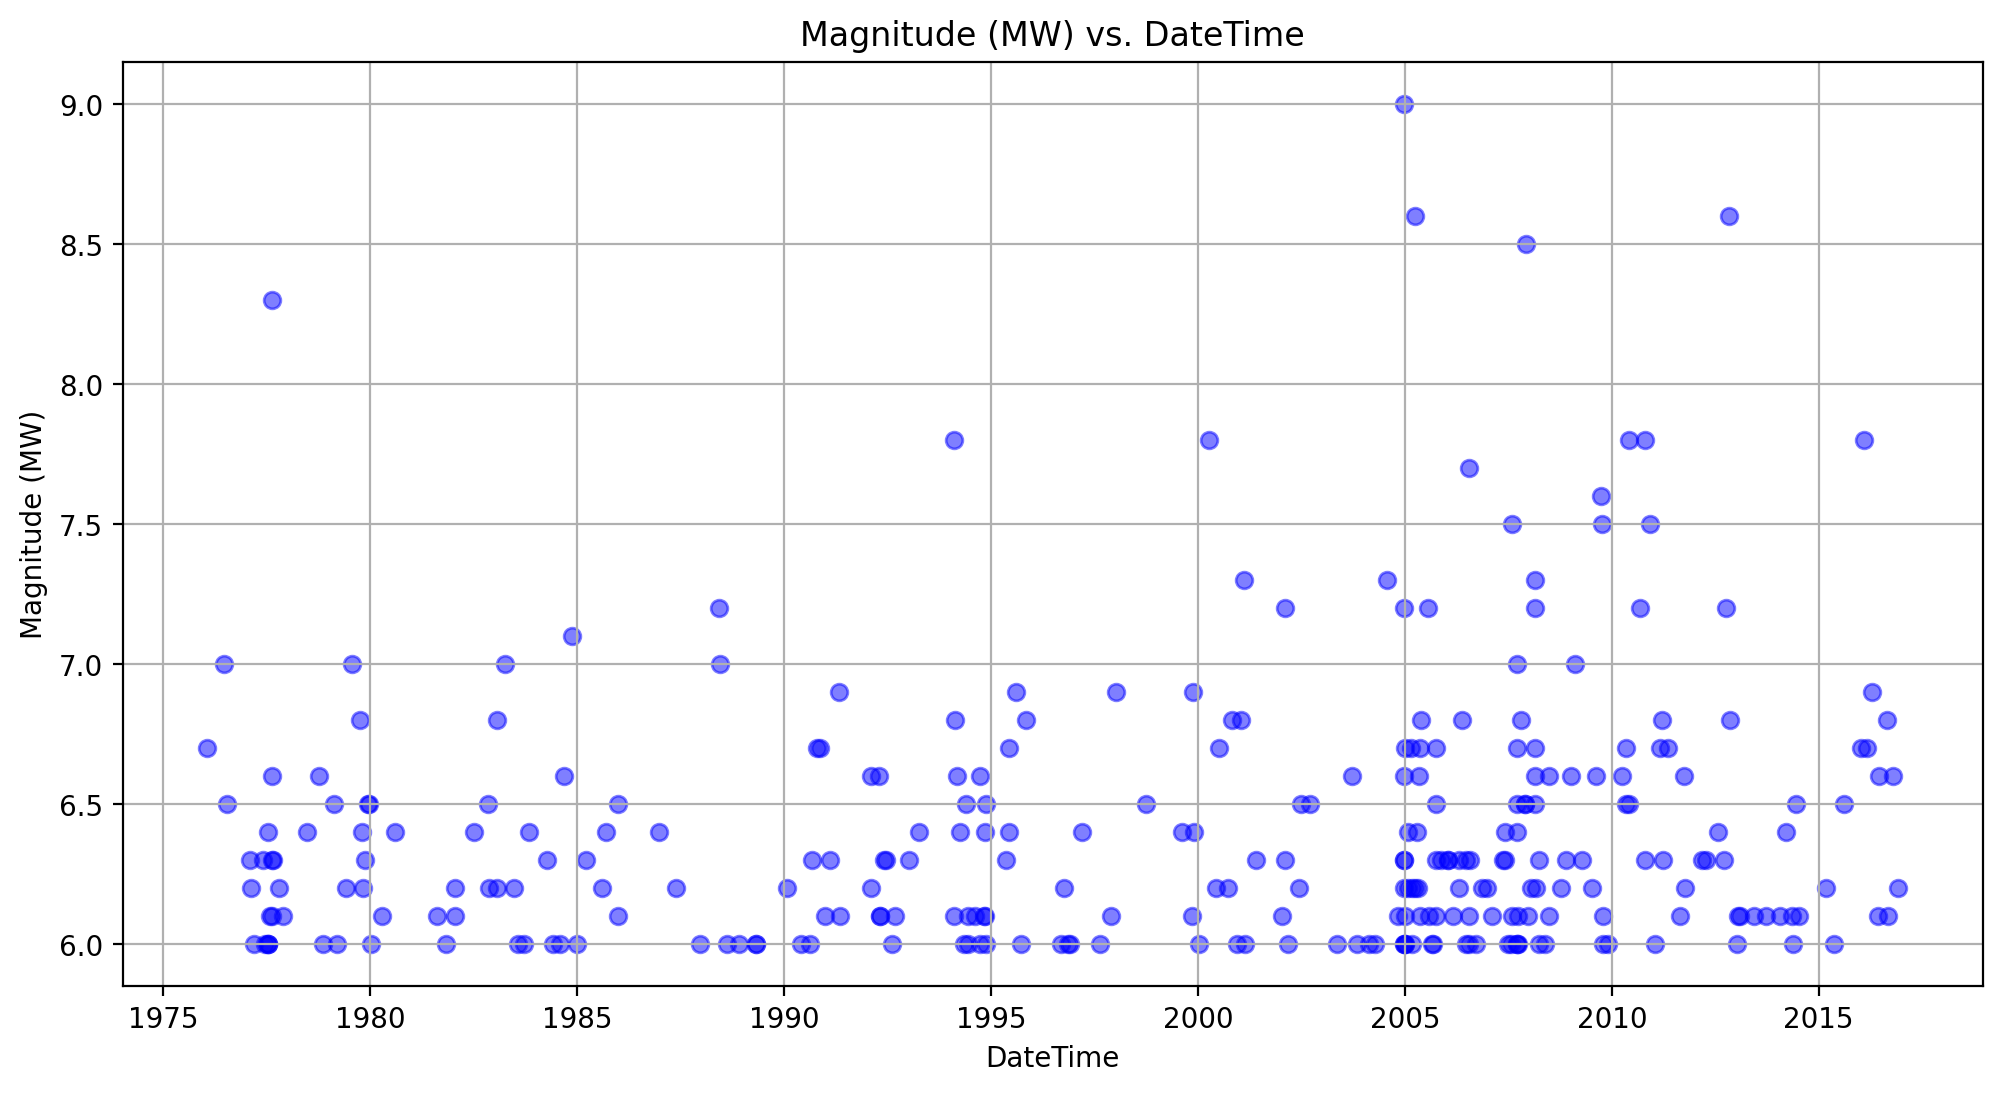

/var/folders/7l/z17fky090gggg0_sw6p28lnr0000gp/T/ipykernel_21246/4195352026.py:193: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  catalog['DATETIME'] = pd.to_datetime(catalog['DATE'], errors='coerce')


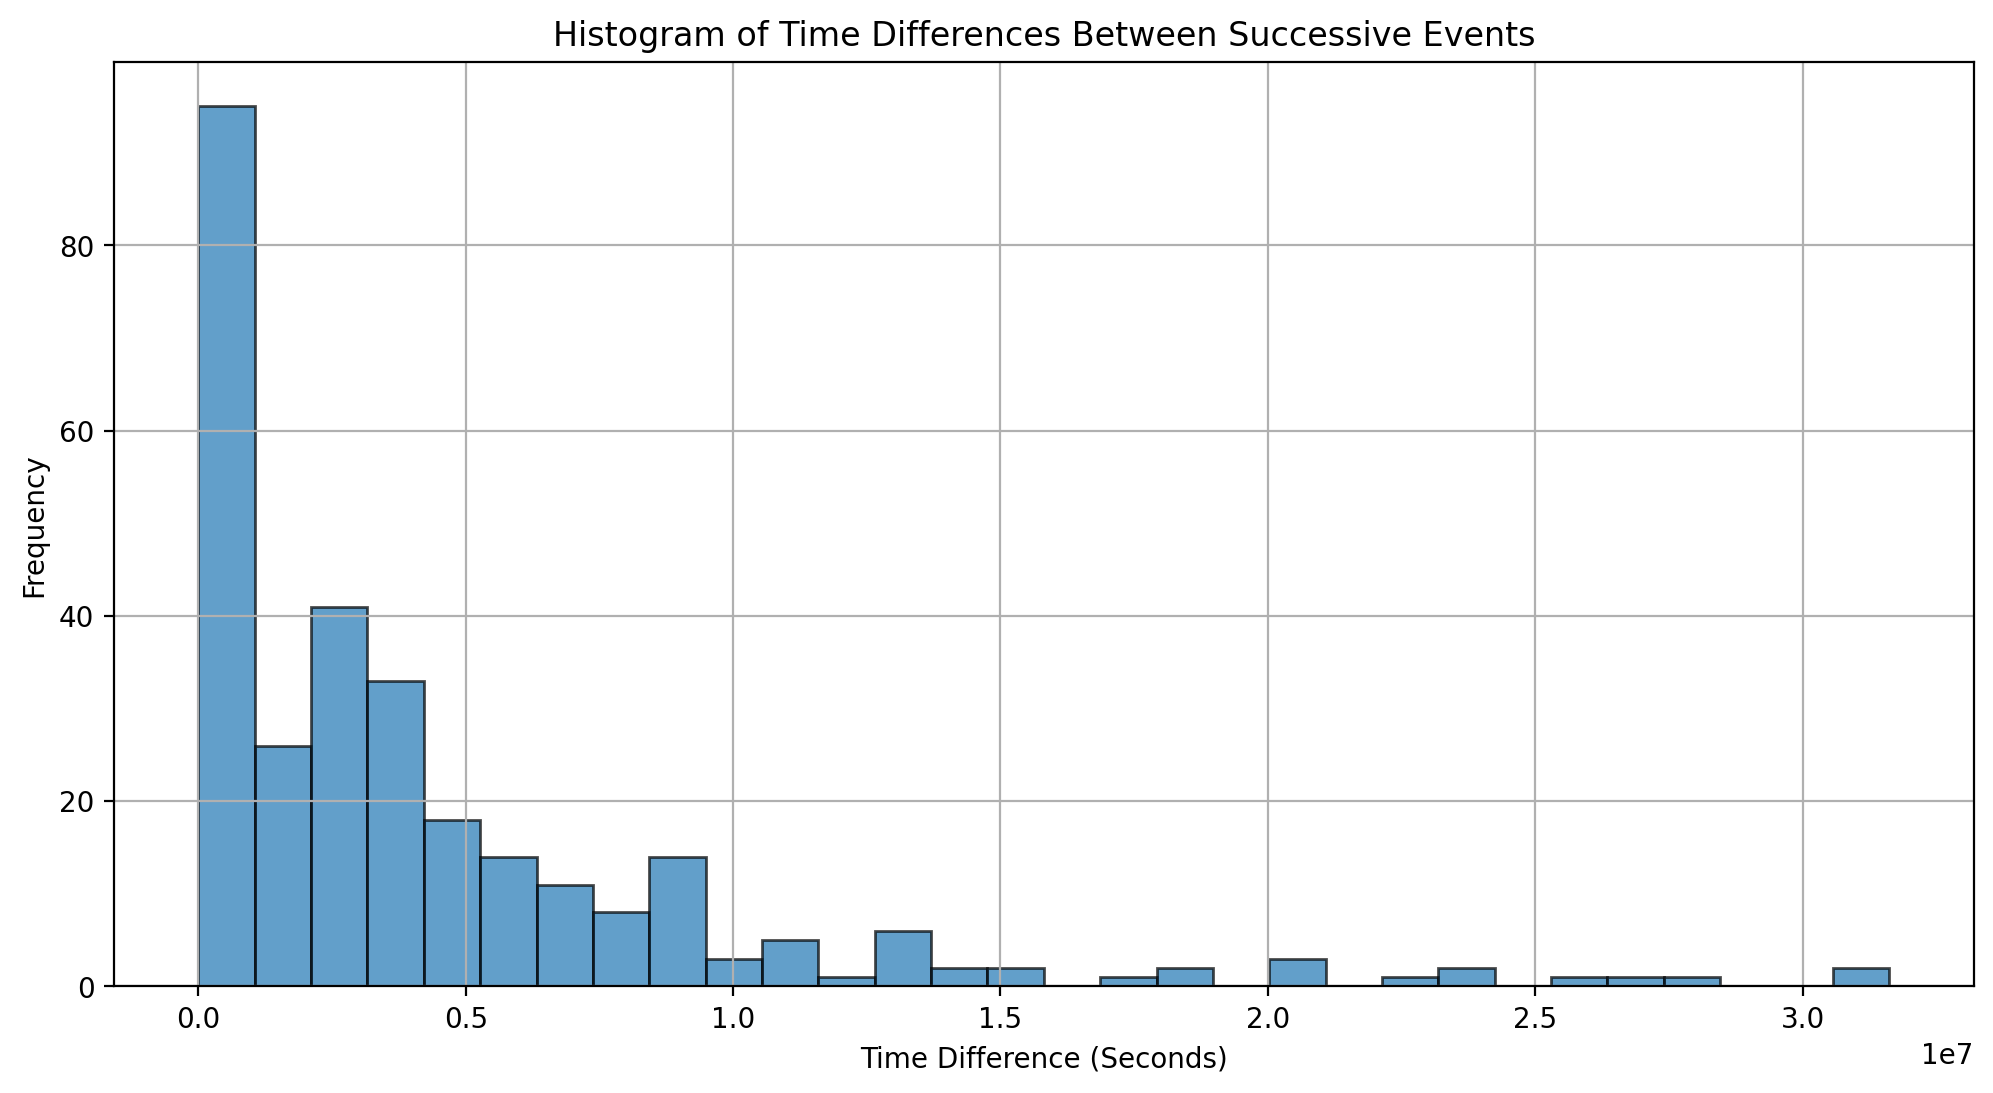

In [3]:
# Initialize a dictionary to store the results for each combination of depth and time thresholds
results = {}
sresults = {}
errors = {}

# time_thresholds = [1 * 30.5 * 24 * 3600,  # 1 month
#                      # 2 months
#                      # 3 months
#                      # 4 months
#                    5 * 30.5 * 24 * 3600,  # 5 months
                   
                
#                    9 * 30.5 * 24 * 3600  # 3 months
#                      # 4 months
#                     # 5 months
#                    ]  # 6 months
time_thresholds = np.arange(30.5*24*3600,12*30.5*24*3600, 30.5*24*3600)
# mag_thresholds = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35,0.4, 0.45, 0.5,0.55, 0.6,0.65, 0.7, 0.75, 0.8,0.85, 0.9,0.95]
mag_thresholds = np.arange(-3, 3, 0.3)

# Combine DATE and TIME and convert to DATETIME
catalog['DATETIME'] = pd.to_datetime(catalog['DATE'], errors='coerce')
catalog = catalog.sort_values('DATETIME').reset_index(drop=True)


catalog = catalog[(catalog['DATETIME'] > '1976-01-01')]

t = np.zeros(len(catalog), dtype=np.float64)
z = np.zeros(len(catalog), dtype=np.float64)
q = np.zeros(len(catalog), dtype=np.float64)

ne = len(t) - 1

dt = np.zeros(ne , dtype=np.float64)
dq = np.zeros(ne  , dtype=np.float64)
dqs = np.zeros(ne , dtype=np.float64)
dts = np.zeros(ne , dtype=np.float64)

#catalog = catalog.dropna(subset=['DATETIME'])

t = catalog['DATETIME'].apply(lambda x: x.timestamp()).values  # Convert datetime to timestamp (seconds since epoch)
z = catalog['DEPTH'].values
q = catalog['MW'].values


z0 = 1000

for m0 in mag_thresholds:
    results[m0] = {}  # Initialize the dictionary for this time threshold
    sresults[m0] = {}  # Initialize the dictionary for this time threshold
    errors[m0] = {}
    for t0 in time_thresholds:

        # Time difference calculation
        ntot = 0
        nn = 0

        for i in range(ne - 1):
            
            dq[i] = (q[i + 1] - q[i])
            dt[i] = abs(t[i + 1] - t[i])
            if z[i] <= z0:
                if dq[i]<= m0:
                    if (dt[i] >= t0 and dt[i] < t0 + 1*30.5*24*3600):
                        nn += 1
                    ntot += 1
                
                  
        print(t0,m0,nn,ntot)
        # Calculate the ratio for real data
        if ntot > 0:
            real_data_ratio = nn*1./ ntot
            results[m0][t0] = real_data_ratio  # Store the result for real data
            error = np.sqrt(real_data_ratio * (1 - real_data_ratio) / ntot)
            errors[m0][t0] = error*0  #!!!!!!!    
        
        else:
            results[m0][t0] = np.nan  # Store NaN if ntot is 0 to avoid errors
            errors[m0][t0] = np.nan  
      
            
            

        # Perform randomization and store the average randomized ratio
        randomized_ratios = []

        for nreal in range(100):
            nns = 0
            ntot = 0
            for i in range(ne - 1):
                tr = t[int(np.random.rand() * ne)]
                qr = t[int(np.random.rand() * ne)]
                dts[i] = abs(t[i + 1] - tr)
                dqs[i] = (q[i + 1] - qr)

                if dts[i] == 0:
                    continue

                if z[i] <= z0:
                    if dqs[i]<= m0:
                        if (dts[i] >= t0 and dts[i] < t0 + 1*30.5*24*3600):
                            nns += 1
                        ntot += 1

            if ntot > 0:
                randomized_ratios.append(nns*1./ ntot)
            else:
                randomized_ratios.append(np.nan)  # Store NaN if ntot is 0 to avoid errors

        average_randomized_ratio = np.nanmean(randomized_ratios)  # Use nanmean to avoid issues with NaN values
        sresults[m0][t0] = average_randomized_ratio  # Store the average of the randomized ratios

# Compute the difference between the real data ratio and the computed average of the randomized ratios
differences = {}
for m0 in mag_thresholds:
    for t0 in time_thresholds:
        if not np.isnan(results[m0][t0]) and not np.isnan(sresults[m0][t0]):
            difference = abs(results[m0][t0] - sresults[m0][t0])
            differences[(m0, t0)] = difference
        else:
            differences[(m0, t0)] = np.nan  # Store NaN if any part of the calculation is NaN

# Prepare the data for plotting
#time_thresholds_months = [1,5]  # in months
time_thresholds_months = np.arange(1,12,1)
mag_values = np.arange(-3, 3, 0.3)
#mag_values = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35,0.4, 0.45, 0.5,0.55, 0.6,0.65, 0.7, 0.75, 0.8,0.85, 0.9,0.95]

# Create a matrix of differences for plotting
difference_matrix_SUM = np.zeros((len(mag_values),len(time_thresholds_months)))
error_matrix_SUM = np.zeros((len(mag_values),len(time_thresholds_months)))
 

# for k, mag in enumerate(mag_values):
#     for j, t_month in enumerate(time_thresholds_months):
#         t_seconds = t_month * 30.5 * 24 * 3600  # Convert months to seconds
#         difference_matrix_SUM[k, j] = differences.get((mag,t_seconds, np.nan))

for k, mag in enumerate(mag_values):
    for j, t_month in enumerate(time_thresholds_months):
        t_seconds = t_month * 30.5 * 24 * 3600  # Convert months to seconds
        # Fetch the difference from the dictionary
        difference = differences.get((mag, t_seconds), np.nan)
        difference_matrix_SUM[k, j] = difference
    
#Plotting the differences
plt.figure(figsize=(12, 8), dpi=200)

# for i, mag in enumerate(mag_values):
#      plt.errorbar(
#          mag_values,
#          difference_matrix_SUM[i, :],
#          yerr=error_matrix_SUM[i, :],
#          marker='o',
#          linestyle='-',
#          label=f'Time Threshold = {t_month} months'
#      )


for i, mag in enumerate(mag_values):
    plt.plot(
        time_thresholds_months,  # Use time thresholds in months for the x-axis
        difference_matrix_SUM[i, :],
        marker='o',
        linestyle='-',
        label=f'Magnitude Threshold = {mag}'
    )


# plt.xlim([0.1, 1.0])  # Example: Set x-axis limits from 0.1 to 1.0
# plt.ylim([0, 1]) 

# plt.title('All (M>5)')
# plt.title('After Removing Kuril-Kamchatka (M>5)')
# plt.title('After Removing Java (M>5)')
# plt.title('Japan-Kuril-Kamchatka All (M>5)')
# plt.title('Java only (M>5)')
plt.xlabel('t0')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6), dpi=200)
plt.scatter(catalog['DATETIME'], catalog['MW'], c='blue', marker='o', alpha=0.5)
plt.title('Magnitude (MW) vs. DateTime')
plt.xlabel('DateTime')
plt.ylabel('Magnitude (MW)')
plt.grid(True)
plt.show()

catalog['DATETIME'] = pd.to_datetime(catalog['DATE'], errors='coerce')

# Remove rows with invalid DATETIME
catalog = catalog.dropna(subset=['DATETIME'])

# Sort by DATETIME
catalog = catalog.sort_values('DATETIME').reset_index(drop=True)

# Calculate differences between successive DATETIME values
time_differences = np.diff(catalog['DATETIME'].values)

# Convert time differences to seconds
time_differences_seconds = time_differences.astype('timedelta64[s]').astype(int)

# Plot histogram of time differences
plt.figure(figsize=(12, 6), dpi=200)
plt.hist(time_differences_seconds, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Time Differences Between Successive Events')
plt.xlabel('Time Difference (Seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [4]:
catalog.DATETIME

0     1976-01-23
1     1976-06-20
2     1976-07-14
3     1977-02-01
4     1977-02-09
         ...    
289   2016-06-12
290   2016-08-24
291   2016-09-06
292   2016-10-19
293   2016-12-02
Name: DATETIME, Length: 294, dtype: datetime64[ns]